In [1]:
# import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('datasale_PCT.csv')
cus_code= pd.read_excel('customer_code_full.xlsx')

C:\Users\DELL\AppData\Local\Temp\ipykernel_12144\2677651912.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasale_PCT.csv')


In [3]:
cus_code= pd.read_excel('customer_code_full.xlsx')

In [4]:
cus_code = cus_code[['Mã KH','Ngày được tạo']].copy()

In [5]:
cus_code.drop_duplicates(inplace=True)

In [6]:
df.columns

Index(['Unnamed: 0', 'Số phiếu', 'Mã KH', 'Mã hàng', 'Tên hàng', 'Nhóm hàng',
       'Ngày', 'Lý do', 'Số lượng', 'Đơn giá', 'Trả lại', 'Hạng thẻ',
       'Chi nhánh'],
      dtype='object')

In [7]:
quanti_condi = df[df['Số lượng']<00].index
df.drop(index=quanti_condi,inplace=True)

In [8]:
cus_condi = df[df['Mã KH']=='KL'].index
df.drop(index=cus_condi,inplace=True)

In [9]:
df.shape

(811897, 13)

In [10]:
cohort_df = df.merge(cus_code,on='Mã KH',how='left')
cohort_df.shape

(811897, 14)

In [11]:
cohort_df.drop_duplicates(inplace=True)

In [12]:
cohort_df.drop(columns='Unnamed: 0',inplace=True)

In [13]:
cohort_df['Ngày']

0         2019-07-01 08:30:27.540
1         2019-07-01 08:45:48.753
2         2019-07-01 08:45:48.753
3         2019-07-01 08:48:24.847
4         2019-07-01 08:52:35.547
                   ...           
811892    2022-07-23 21:17:08.130
811893    2022-07-24 17:51:57.220
811894    2022-07-23 18:58:59.917
811895    2022-07-23 17:10:34.600
811896    2022-07-23 14:14:23.250
Name: Ngày, Length: 784124, dtype: object

In [14]:
cohort_df['Ngày được tạo']

0        2012-08-31 09:48:03.610
1        2016-09-28 10:17:31.310
2        2016-09-28 10:17:31.310
3        2016-09-28 10:17:31.310
4        2013-06-29 17:00:33.413
                   ...          
811892   2021-08-23 18:15:08.010
811893   2021-10-19 16:34:12.563
811894   2016-12-02 18:10:46.590
811895   2022-07-23 17:08:29.370
811896   2022-07-23 14:06:24.720
Name: Ngày được tạo, Length: 784124, dtype: datetime64[ns]

In [15]:
cohort_df['Ngày'] = pd.to_datetime(cohort_df['Ngày'])
cohort_df['Ngày được tạo'] = pd.to_datetime(cohort_df['Ngày được tạo'])


In [17]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
cohort_df['Tháng giao dịch'] = cohort_df['Ngày'].apply(get_month)
cohort_df['Tháng cohort'] = cohort_df['Ngày được tạo'].dt.strftime('%Y-%m')


In [19]:
cohort_df['Tháng cohort']  = pd.to_datetime(cohort_df['Tháng cohort'])

In [20]:
## function untuk extract integer value dari data
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

invoice_year, invoice_month, _ = get_date_int(cohort_df, 'Tháng giao dịch')
cohort_year, cohort_month, _ = get_date_int(cohort_df, 'Tháng cohort')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

cohort_df['CohortIndex'] = years_diff * 12 + months_diff + 1


In [21]:
cohort_df

,Số phiếu,Mã KH,Mã hàng,Tên hàng,Nhóm hàng,Ngày,Lý do,Số lượng,Đơn giá,Trả lại,Hạng thẻ,Chi nhánh,Ngày được tạo,Tháng giao dịch,Tháng cohort,CohortIndex
0,HN1AA748351,AA030816,8809104293699,Băng vệ sinh Yejimiin Tencel size S16p,"Nhóm hàng\ĐỒ CHO GIA ĐÌNH\HÓA MỸ PHẨM\Giấy, Bă...",2019-07-01 08:30:27.540,XBA,1.0,6.000000e+04,0.0,Chưa lên thẻ,PCT#SNB-PCT,2012-08-31 09:48:03.610,2019-07-01,2012-08-01,84.0
1,HN1AA748353,HN1AA516445,S450NX09FS345,Khăn tắm Nous 3 lớp chó mèo xanh,Nhóm hàng\DÀNH CHO BÉ\QUẦN ÁO SƠ SINH (0-12)\P...,2019-07-01 08:45:48.753,XBA,1.0,3.450000e+05,0.0,Thẻ bạc,PCT#SNB-PCT,2016-09-28 10:17:31.310,2019-07-01,2016-09-01,35.0
2,HN1AA748353,HN1AA516445,4901360315826,BOURBON- Kẹo dẻo vị nho 50g,Nhóm hàng\ĐỒ CHO GIA ĐÌNH\THỰC PHẨM\Bánh Kẹo,2019-07-01 08:45:48.753,XBA,2.0,3.500000e+04,0.0,Thẻ bạc,PCT#SNB-PCT,2016-09-28 10:17:31.310,2019-07-01,2016-09-01,35.0
3,HN1AA748354,HN1AA516445,S450NX09FS345,Khăn tắm Nous 3 lớp chó mèo xanh,Nhóm hàng\DÀNH CHO BÉ\QUẦN ÁO SƠ SINH (0-12)\P...,2019-07-01 08:48:24.847,XBA,1.0,3.450000e+05,0.0,Thẻ bạc,PCT#SNB-PCT,2016-09-28 10:17:31.310,2019-07-01,2016-09-01,35.0
4,HN1AA748355,0241.02,5900931022896,Sữa tắm và gội Bobini dành cho trẻ em 2&1 Ma t...,Nhóm hàng\DÀNH CHO BÉ\ĐỒ CHĂM SÓC BÉ TẮM\Dầu G...,2019-07-01 08:52:35.547,BB,5.0,1.250000e+05,0.0,Thẻ kim cương,PCT#SNB-PCT,2013-06-29 17:00:33.413,2019-07-01,2013-06-01,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811892,PCTAA130158,PCTAA007912,4892030081274,Bánh trung thu trứng chảy MX Lava Quartet 360g,Nhóm hàng\DÀNH CHO GIA ĐÌNH\BÁNH KẸO SỮA THẠCH...,2022-07-23 21:17:08.130,XBA,5.0,1.250000e+06,0.0,Thẻ kim cương,PCT#SNB-PCT,2021-08-23 18:15:08.010,2022-07-01,2021-08-01,12.0
811893,PCTAA130247,LGIAA003772,4969220006680,Xe đẩy trẻ em Aprica Karoon Air AC Bright Stri...,"Nhóm hàng\DÀNH CHO BÉ\XE ĐẨY, GHẾ NGỒI Ô TÔ, Đ...",2022-07-24 17:51:57.220,XBA,1.0,6.818182e+06,0.0,Thẻ vàng,PCT#SNB-PCT,2021-10-19 16:34:12.563,2022-07-01,2021-10-01,10.0
811894,PCTAA130133,HN1AA519435,5056080611914,Ghế ngồi ô tô trẻ em Joie i-Spin Grow Oyster R,"Nhóm hàng\DÀNH CHO BÉ\XE ĐẨY, GHẾ NGỒI Ô TÔ, Đ...",2022-07-23 18:58:59.917,XBA,1.0,1.227273e+07,0.0,Thẻ vàng,PCT#SNB-PCT,2016-12-02 18:10:46.590,2022-07-01,2016-12-01,68.0
811895,PCTAA130110,PCTAA194744,5056080611914,Ghế ngồi ô tô trẻ em Joie i-Spin Grow Oyster R,"Nhóm hàng\DÀNH CHO BÉ\XE ĐẨY, GHẾ NGỒI Ô TÔ, Đ...",2022-07-23 17:10:34.600,XBA,1.0,1.227273e+07,0.0,Thẻ bạc,PCT#SNB-PCT,2022-07-23 17:08:29.370,2022-07-01,2022-07-01,1.0


<AxesSubplot: >

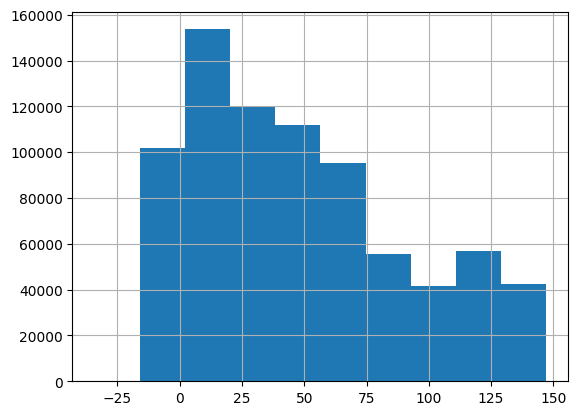

In [24]:
cohort_df['CohortIndex'].hist()

In [25]:
filt_df =  cohort_df[(cohort_df['CohortIndex']<37)&(cohort_df['CohortIndex']>0)].copy()

In [32]:
filt_df = filt_df[filt_df['Tháng cohort']>'2019-07'].copy()

In [33]:
## grouping customer berdasarkan masing masing cohort
grouping = filt_df.groupby(['Tháng cohort', 'CohortIndex'])
cohort_data = grouping['Mã KH'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='Tháng cohort', columns='CohortIndex', values='Mã KH')

In [48]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.round(4) * 100
retention.index = retention.index.strftime('%Y-%b')

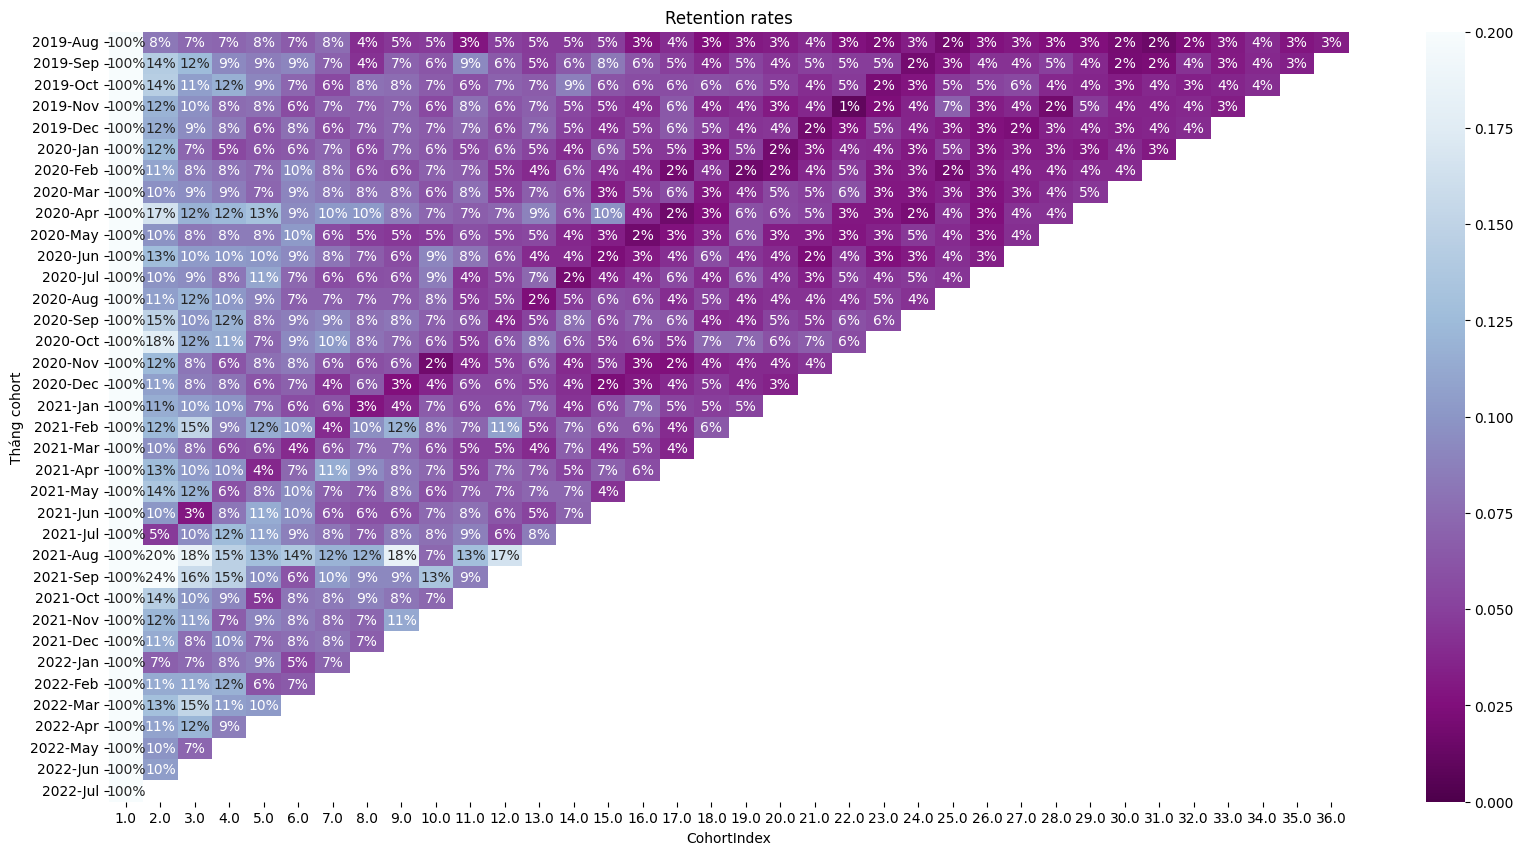

In [54]:
plt.figure(figsize=(20, 10))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.2,cmap="BuPu_r")
plt.show()
plt.show()